In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

%matplotlib inline

In [2]:
#importing dataset
train = pd.read_csv(r"C:\Users\neetac1973\Downloads\SalaryData_Train.csv")
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
test = pd.read_csv(r"C:\Users\neetac1973\Downloads\SalaryData_Test.csv")
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
#copying the data
df1 = train.copy()
df2 = test.copy()

In [5]:
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [7]:
df1.head() #returns a specified number of rows, string from the top

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df2.head() 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [9]:
df1.isnull().sum() # returns the number of missing values in the dataset

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
df2.isnull().sum() 

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
df1.info() #gives information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [12]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [13]:
df1[df1.duplicated()].shape # returns Series with True and False values 

(3258, 14)

In [14]:
Df1 =df1.drop_duplicates() #removes duplicate rows

In [15]:
Df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [16]:
Df2 = df2.drop_duplicates()
Df2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


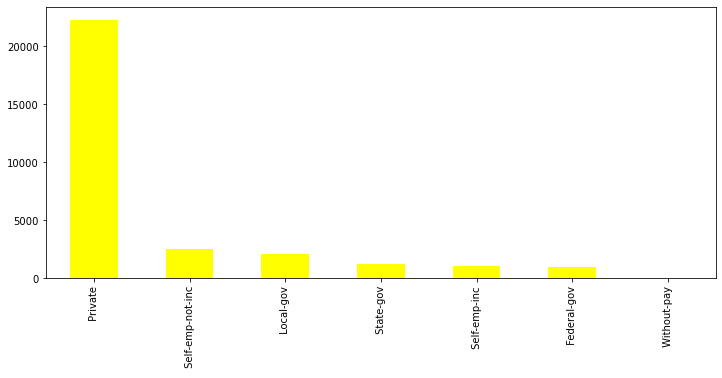

In [18]:
plt.figure(figsize=(12,5)) #used to make a horizontal bar plot
df1.workclass.value_counts().plot.bar(color='yellow');

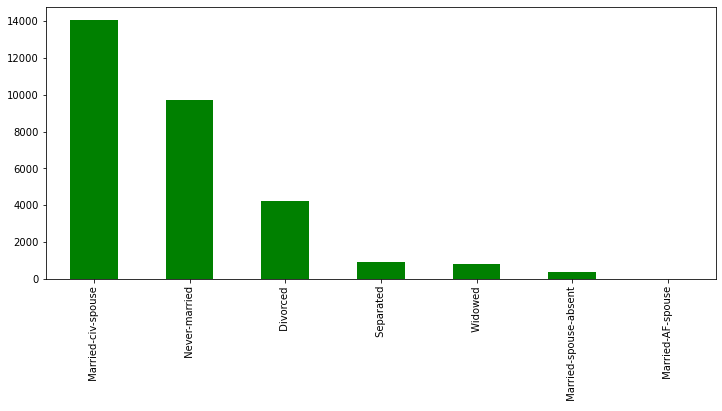

In [17]:
plt.figure(figsize=(12,5))
df1.maritalstatus.value_counts().plot.bar(color='green');


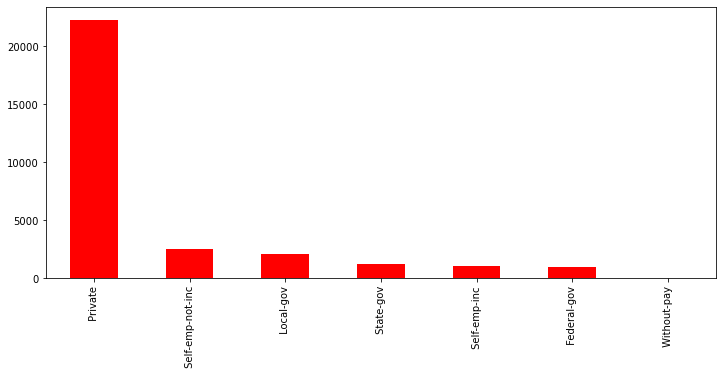

In [19]:
plt.figure(figsize=(12,5)) #used to make a horizontal bar plot
df1.workclass.value_counts().plot.bar(color='red');

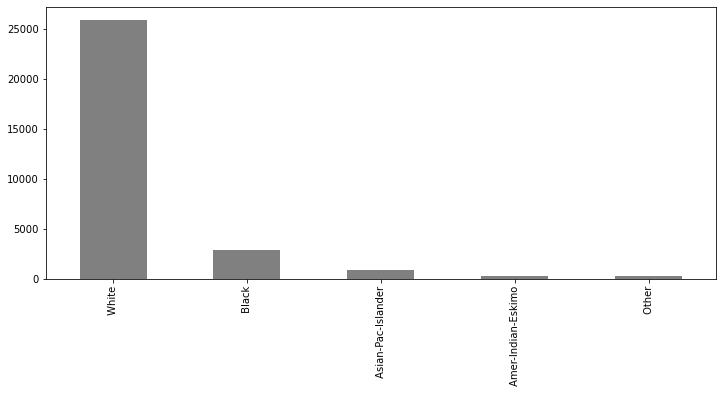

In [20]:
plt.figure(figsize=(12,5))
df1.race.value_counts().plot.bar(color='grey');

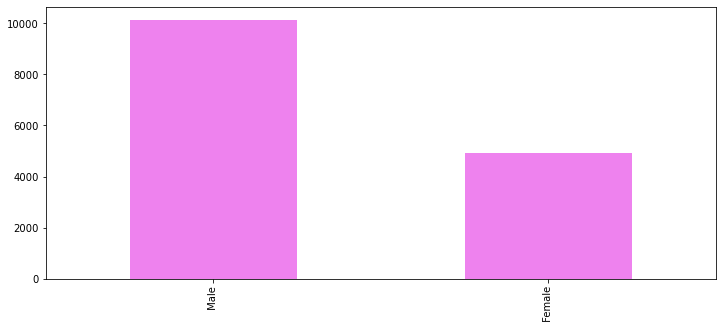

In [21]:
plt.figure(figsize=(12,5))
df2.sex.value_counts().plot.bar(color='violet');

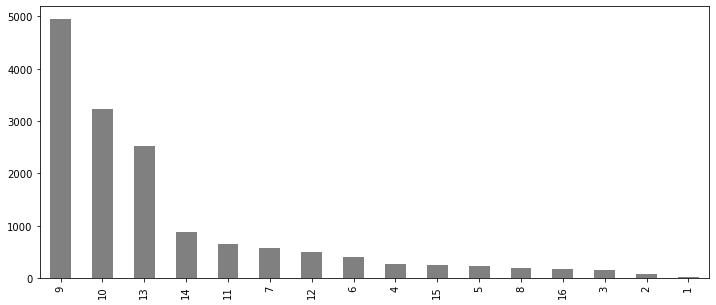

In [22]:
plt.figure(figsize=(12,5))
df2.educationno.value_counts().plot.bar(color='grey');

In [23]:
##One Hot Encoding
#converting non numeric data into numeric using one hot encoder

tr1 = df1.iloc[:,0:13]

tr1 = pd.get_dummies(tr1)
tr1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
te1 = test.iloc[:,0:13]

te1 = pd.get_dummies(te1)
te1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
finaltrain = pd.concat([tr1, df1['Salary']],axis=1)
finaltrain

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,<=50K
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,>50K
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K


In [30]:
#test data concat
finaltest = pd.concat([te1, df2['Salary']],axis=1)
finaltest

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,>50K
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,>50K
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
15058,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K


In [31]:
##Dividing Finaltrain and Finaltest Data
# Finaltrain data
X = finaltrain.values[:,0:102]
Y = finaltrain.values[:,102]

In [32]:
X

array([[39, 13, 2174, ..., 1, 0, 0],
       [50, 13, 0, ..., 1, 0, 0],
       [38, 9, 0, ..., 1, 0, 0],
       ...,
       [58, 9, 0, ..., 1, 0, 0],
       [22, 9, 0, ..., 1, 0, 0],
       [52, 9, 15024, ..., 1, 0, 0]], dtype=object)

In [33]:
Y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [35]:
#Finaltest data
x = finaltest.values[:,0:102]
y = finaltest.values[:,102]

In [36]:
y

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [37]:
x

array([[25, 7, 0, ..., 1, 0, 0],
       [38, 9, 0, ..., 1, 0, 0],
       [28, 12, 0, ..., 1, 0, 0],
       ...,
       [38, 13, 0, ..., 1, 0, 0],
       [44, 13, 5455, ..., 1, 0, 0],
       [35, 13, 0, ..., 1, 0, 0]], dtype=object)

In [38]:
##Naive Bayes Model
#Multinomial Naive Bayes

classifier_mb = MB()
classifier_mb.fit(X,Y)

MultinomialNB()

In [39]:
train_pred_m = classifier_mb.predict(X)
accuracy_train_m = np.mean(train_pred_m==Y)

In [40]:
test_pred_m = classifier_mb.predict(x)
accuracy_test_m = np.mean(test_pred_m==y)

In [41]:
print('Training accuracy is:',accuracy_train_m,'\n','Testing accuracy is:',accuracy_test_m)

Training accuracy is: 0.7729186698053778 
 Testing accuracy is: 0.7749667994687915


In [42]:
##Gaussian Naive Bayes
classifier_gb = GB()
classifier_gb.fit(X,Y) 

GaussianNB()

In [43]:
# we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(X)
accuracy_train_g = np.mean(train_pred_g==Y)

In [44]:
test_pred_g = classifier_gb.predict(x)
accuracy_test_g = np.mean(test_pred_g==y)

In [45]:
print('Training accuracy is:',accuracy_train_g,'\n','Testing accuracy is:',accuracy_test_g)

Training accuracy is: 0.8031563940187659 
 Testing accuracy is: 0.8029216467463479
